 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete        | Versión       | Licencia                   | Fabricante                 | Características  |
| :----------       | :------------ | :--------------------------| :-----------------------   | :--------------- |
| Ahkab             |               |GPL                         | Giuseppe Venturini         | Basado en Python |
| Altium Designer   |               |On-Demand                   | Altium                     |                  |
| Intusoft          |               |                            |                            |                  |
| MacSpice          | 3.1.24        |Freeware                    | Charles D. H. Williams     |                  | 
| Gnucap            | 0.35          |Freeware                    | Gentoo Electronics Project |                  | 
| ngspice           | 33            |BSD License                 | sourceforge.net            |                  |
| TopSPICE          | 8             | Pago                       | Penzar Development         |                  |
| Spice Opus        |Spice OPUS 2.33|Freeware                    | Grupo EDA,Univ de Liubliana|                  |
| SystemVision Cloud|               |Libre/Pago                  | Mentor                     |                  |
| Multisim          |               | Pago                       | National Instruments (NI)  |                  |
| Tina Design Suite |   9.3         | Pago                       | Tina                       | Basado en JAVA   |
| LTspice           |   XVII        | Freeware                   | Analog Devices, Inc.       |                  |
| PSpice/OrCAD      |OrCAD 2019-17.4| Pago                       | Cadence Design Systems, Inc|                  |
| Oregano           | 0.84.43       | GNU General Public License | Richard Hult               |                  |

 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces?
 

>>
 
>>Como  C es un lenguaje muy poderoso y flexible su uso se difundió muy rápidamente mas allá de los laboratorios Bell. Los programadores de todo el mundo comenzaron a usarlo para escribir todo tipo de programas. Sin embargo, diferentes organizaciones comenzaron a utilizar muy pronto sus propias versiones del C,  las pequeñas diferencias entre las implementaciones comenzaron a dar problemas a los programadores.<br>
Para resolver este problema, el American National Stándards (ANSI) formo un comité en 1983 para establecer una definición estándar del C, que llego a ser conocida como C estándar  ANSI. Con unas cuantas excepciones, todos los compiladores del C modernos de adhieren a este estándar.
Algunas de las versiones existentes son:  
>>- Quick C<br>
>>- C++<br>
>>- Turbo C<br>
>>- Turbo C ++<br>
>>- Borland C<br>
>>- Borland C++<br>
>>- Microsoft C<br>
>>- Turbo C 2.0<br>
>>- Turbo C++ 1.0<br>
>>- Borland C++ 2.0<br>
>>- DJGPP



 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

>>| Múltiplo | Abreviatura | Equivalencia  ||| Submúltiplo | Abreviatura |  Equivalencia  |
| :------- | :---------: | :----------:  ||| :---------- | :---------: | :------------: |
|  deca-   |     da      |10<sup>1</sup> |||    deci-    |     d       |10<sup>-1</sup> |
|  hecto-  |     h       |10<sup>2</sup> |||    centi-   |     c       |10<sup>-2</sup> |
|  kilo-   |     k       |10<sup>3</sup> |||    mili-    |     m       |10<sup>-3</sup> |
|  mega-   |     M       |10<sup>6</sup> |||    micro-   |     µ       |10<sup>-6</sup> |
|  giga-   |     G       |10<sup>9</sup> |||    nano-    |     n       |10<sup>-9</sup> |
|  tera-   |     T       |10<sup>12</sup>|||    pico-    |     p       |10<sup>-12</sup>|
|  peta-   |     P       |10<sup>15</sup>|||    femto-   |     f       |10<sup>-15</sup>|
|  exa-    |     E       |10<sup>18</sup>|||    atto-    |     a       |10<sup>-18</sup>|
|  zetta-  |     Z       |10<sup>21</sup>|||    zepto-   |     z       |10<sup>-21</sup>|
|  yotta-  |     Y       |10<sup>24</sup>|||    yocto-   |     y       |10<sup>-24</sup>|


 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.
 
>>|                 Magnitud                 |           Nombre          |    Símbolo    | 
| :--------------------------------------- | :-----------------------: | ------------: |
|Carga eléctrica (Q)                       |culombio                   |C              |
|Intensidad de corriente (I)               |amperio                    |A              |
|Densidad de corriente eléctrica (I)       |amperio por metro cuadrado |A/m<sup>2</sup>|
|Diferencia de potencial (ΔV)              |voltio                     |V              |
|Impedancia (Z)                            |ohmio                      |Ω              |
|Reactancia (X)                            |ohmio                      |Ω              |
|Resistencia (R)                           |ohmio                      |Ω              | 
|Resistividad (ρ)                          |ohmio por metro            |Ω·m            |  
|Potencia (P)                              |Watt                       |W              |  
|Capacidad (C)                             |faradio                    |F              |  
|Flujo eléctrico (Φ<sub>E</sub>)           |Voltio metro               |V·m            |
|Inducción eléctrica (D)                   |Culombio por metro cuadrado|C/m<sup>2</sup>|
|Fuerza de campo eléctrico (E)             |Voltio por metro           |V/m            |
|Permitividad (ε)                          |Faradio por metro          |F/m            |
|Susceptibilidad eléctrica (X<sub>e></sub>)|*sin dimensión*            |               |
|Conductividad (σ)                         |siemens por metro          |S/m            |
|Inductancia (L)                           |henrio                     |H              |
|Frecuencia (f)                            |hercio                     |Hz             |
|Conductancia eléctrica (G)                |siemens                    |S              |
|Flujo magnético (Φ)                       |weber                      |Wb             |
|Densidad de flujo magnético (B)           |tesla                      |T              |
|Fuerza del campo magnético (H)            |amperio por metro          |A/m            |  
|Permeabilidad (μ)                         |henrio por metro           |H/m            |
|Susceptibilidad magnética (X)             |*sin dimensiones*          |               |

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 

 >>Programar una simulación de circuito con SPICE es muy parecido a la programación en cualquier otro lenguaje informático: se deben escribir los comandos como texto en un archivo, guardar ese archivo en el disco duro del ordenador y, a continuación, procesar el contenido de ese archivo con un programa (compilador o intérprete) que entienda dichos comandos. En un lenguaje informático interpretado, el ordenador tiene un programa especial llamado intérprete que traduce el programa que escribió (el llamado archivo fuente) al propio idioma del ordenador, sobre la marcha, como se está ejecutando.  
>>En un lenguaje informático compilado, el programa que escribió es traducido a la vez al propio lenguaje del ordenador por un programa especial llamado compilador. Después de que el programa que ha escrito ha sido "compilado", el archivo ejecutable resultante no necesita más traducción para ser entendido directamente por el ordenador. Ahora se puede "ejecutar" en un equipo si se ha instalado o no software del compilador en ese equipo: SPICE es un lenguaje interpretado.  Para que un ordenador pueda entender las instrucciones SPICE que escriba, debe tener instalado el programa SPICE (intérprete): los archivos de origen SPICE se conocen comúnmente como "netlists", escribiendo instrucciones línea por línea utilizando un procesador de textos o un editor de texto siguiendo ciertas convenciones de programación.  
Es un lenguaje informático en sí mismo, aunque simple.  
Es decir, podríamos enclavarlo en un tipo de lenguaje funcional. 
 

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un valor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).
 
>>## Usos del parámetro `uic`
UIC (Use Initial Conditions): Se utiliza para especificar el estado del circuito en el momento t = tstart.
Los valores disponibles son 0,  1,  2  o  3.
>>- uic=0: se presumirá que todas las tensiones y corrientes de nodo a través de fuentes de v/h/e/ son cero en t = tstart
>>- uic=1: el estado en t=tstart es el último resultado de un análisis de `.op`.
>>- uic=2: el estado en t=tstart es el último resultado de un análisis de `.op` en el que se establecen los valores de corrientes a través de inductores y voltajes en los capacitores especificados en su ic. Esto se hace de manera tosca, por lo que es recomendable comprobar.
>>- uic=3: Carga un ic proporcionado por el usuario. Esto requiere una directiva `.ic` en algún lugar de la netlist y el nombre de la `.ic` y `ic_label` deben coincidir.

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implementación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).
 
 
 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).
>>En palabras del mismísimo Giuseppe Venturini, creador de Ahkab, "Este proyecto nació cuando yo era un estudiante entusiasta, aparentemente con mucho tiempo libre, asistiendo a "Simulazione Circuitale" (Simulación de Circuitos) impartido por el Prof. A. Brambilla en Italia en la Universidad Politécnica de Milán.<br><br>
No obstante Ian Daniher y Rob Crowther aparecen como colaboradores habiendo hecho contribuciones.<br><br>
El software nació para ser un simulador de circuitos electrónicos tipo SPICE escrito en Python.<br><br>
Se encuentra en la versión 0.18, con licencia GPL-2.0+<br><br>
Las dependencias son: numpy, scipy, sympy, matplotlib y tabulate.<br><br>
Las diferentes versiones que han sido implementadas son:<br>
    - v 0.10 (30 de mayo de 2014)<br>
    - v 0.11 (22 de octubre de 2014)<br>
    - v 0.12 (6 de enero de 2015)<br>
    - v 0.13 (17 de febrero de 2015)<br>
    - v 0.14 (14 de abril de 2015)<br>
    - v 0.15 (20 de abril de 2015)<br>
    - v 0.16 (7 de mayo de 2015)<br>
    - v 0.17 (17 de mayo de 2015)<br>
    - y, finalmente la v 0.18 (12 de julio de 2015)


 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. La configuración de Python en VS Code está bien explicada su [documentación](https://code.visualstudio.com/docs/python/python-tutorial).

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:

In [72]:
!pip install ahkab

  Created wheel for ahkab: filename=ahkab-0.18-py3-none-any.whl size=189112 sha256=fd58cd2bae51562023548c5b2efc98703901acecb42fb1d9a2049bd0b783dbd1
  Stored in directory: c:\users\agus\appdata\local\pip\cache\wheels\bf\d4\64\eab864e926bf721aa7ba412a1c77b1ac72d88740566177f057
Successfully built ahkab



 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instalar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [73]:
!conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\AGUS\scoop\apps\miniconda3\current

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py37h03978a9_0         143 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    freetype-2.10.4            |       h546665d_0         493 KB  conda-forge
    kiwisolver-1.3.1           |   py37h8c56517_0          58 KB  conda-forge
    libtiff-4.1.0              |       h56a325e_1         739 KB
    lz4-c-1.9.3                |       h8ffe710_0         134 KB  conda-forge
    matplotlib-3.3.3           |   py37h03978a9_0           7 KB  conda

In [5]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


 > **Pregunta:** ¿Qué es y para qué sirve PyLab?
 >>PyLab es una interfaz de procedimiento para la biblioteca de trazado orientada a objetos Matplotlib. Matplotlib es todo el paquete; matplotlib.pyplot es un módulo en Matplotlib; y PyLab es un módulo que se instala junto a Matplotlib.  
PyLab es un módulo de conveniencia que importa a granel matplotlib.pyplot (para trazar) y NumPy (para Matemáticas y trabajar con matrices) en un solo espacio de nombre. Aunque muchos ejemplos utilizan PyLab, ya no se recomienda.
 
 ## Circuitos sencillos para trabajar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.
 
 

$$V = I\cdot R$$

Teniendo en cuenta que:

- el voltaje ($V$) se mide en $\mathrm {V (voltios) =\frac {J  (julios)}  {C  (culombios)} } $, que es lo mismo que $ \mathrm{\frac{{kg \cdot m^2}}{{s^3\cdot A}}} $


- la Intensidad de la corriente ($I$) se mide en amperios (A)


- y la resistencia ($R$) en ohmios ($\Omega$), que es lo mismo que $ \mathrm{\frac{{kg \cdot m^2}}{{s^3\cdot A^2}}} $

Entonces:


$$ \mathrm{\frac{{kg \cdot m^2}}{{s^3\cdot A}}} = \color{red}{\mathrm A} \cdot \mathrm{\frac{{kg \cdot m^2}}{{s^3\cdot {A^\color{red}2}}}} $$
por lo que eliminamos los A (amperios) coloreados en rojo, quedando los dos términos igualados.


 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [20]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [21]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [22]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?
>>`lista_de_análisis` sería un ***array***

 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [300]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [29]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)
if [i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()][0]==1:
       lista_de_análisis[1]['outfile'] = "simulación dc.tsv"
else:
       lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


De esta manera añadiendo estas líneas de arriba podemos automatizar y ahorrarnos algún paso y, por tanto, en el caso de que el análisis fuera `.dc`, nos devolvería un archivo ***"simulación dc.tsv"*** como archivo de outfile. En el caso de ser `.tran` nos generará otro archivo que sería ***"simulación tran.tsv"***. 

In [24]:
[i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()][0] 

1

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [30]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [31]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-03 07:44:41, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [305]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

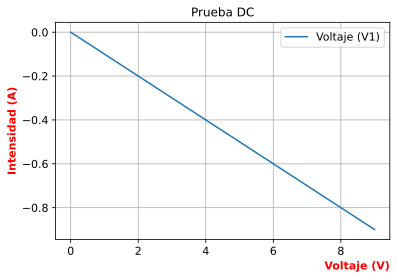

In [306]:
figura = plt.figure()
plt.grid()
plt.title("Prueba DC")
plt.xlabel("Voltaje (V)",weight='bold',color='red',loc='right',)
plt.ylabel("Intensidad (A)",weight='bold',color='red')
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")
plt.legend()

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

>>En esta gráfica podemos observar cómo varía la intensidad de la corriente que circula por el circuito a medida que variamos el voltaje de la pila, desde 0 hasta 9V. Aunque la intensidad aparezca con números negativos, se ve que a medida que el voltaje va aumentando, la intensidad también lo hace. Además, lo hace de forma lineal ya que la Ley de Ohm no tiene ni potencias, ni raíces, de forma que solo puede haber una **recta**.
La biblioteca que utilizamos para graficar es la de *Matplotlib*, que es una librería para Python ampliamente usada.

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [28]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.9}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

>>Si partimos de la fórmula (o "Programa") de la ley de Ohm: $V=I \cdot R$ y teniendo en cuenta que la resistencia era de 10 $\Omega$ (en el esquema del circuito aparece como de 100 $\Omega$, pero en los datos que le pasamos a ahkab aparecen 10 $\Omega$)...  
$I$ = -9.0 V · 10 $\Omega$ = -0.9 A

In [29]:
# se importan todas las unidades implicadas
from sympy import solve, symbols, Eq
from sympy. physics.units import convert_to
from sympy. physics.units import ampere
from sympy. physics.units import volt
from sympy. physics.units import ohm
R = 10 * ohm
V = 9 * volt
I = symbols("Intensidad")
eq_ohm = Eq(I, V/R)
solucion_I = solve(eq_ohm, I)
I = solucion_I
I = convert_to(solucion_I[0], [ampere]).n(2)
print (I)

0.9*ampere


Resolviendo el problema desde dos entornos distintos, obtenemos los mismos resultados: `0,9 A`

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [40]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

**Pregunta**: ¿Qué significan las opciones `-b` y `-ascii`? Algo de ayuda [aquí](http://ltwiki.org/LTspiceHelp/LTspiceHelp/Command_Line_Switches.htm).

>- ascii --> este modificador sirve para transformar los resultados del análisis de LTspice, que los da en lenguaje binario, a lenguaje ASCII.  
>- b --> ejecuta en modo por lotes y los presenta ordenados

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [33]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 10
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [34]:
lts "circuito sencillo.net"

Veamos el contenido de la simulación.

In [35]:
%pycat circuito sencillo.log

Circuit: * Este es un circuito sencillo adaptado para LTspice

Direct Newton iteration for .op point succeeded.

Date: Thu Dec 31 12:13:28 2020
Total elapsed time: 0.012 seconds.

tnom = 27
temp = 27
method = trap
totiter = 3
traniter = 0
tranpoints = 0
accept = 0
rejected = 0
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: 36 bytes object code size
Matrix Compiler2: 96 bytes object code size


Ahora repitamos lo mismo para el análisis `.dc`:

In [38]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencillo.net


In [40]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [38]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

Text(0, 0.5, 'Intensidad (A)')

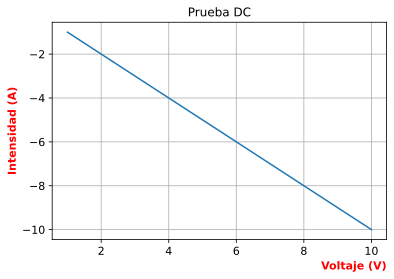

In [59]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
plt.plot(tiempo, voltaje)
plt.grid()
plt.title("Prueba DC")
plt.xlabel("Voltaje (V)",weight='bold',color='red',loc='right',)
plt.ylabel("Intensidad (A)",weight='bold',color='red')

** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [43]:
!ahkab "circuito sencillo.sp"

2020-12-31 11:14:14
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1              10              -9             -0.9      8.1

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9             -0.9     -8.1

Total power dissipation: 8.1 W

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.00000000000000000

**Ejercicio premium**: Graficar los datos anteriores con [Gnuplot](http://www.gnuplot.info). 

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). Más info [aquí](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [91]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [92]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`:

In [93]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-03 19:10:01, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

Cargamos primero todo lo relacionado con Sympy:

In [94]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [103]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [96]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)


In [97]:
# Para calcular el valor del potencial en V3 debemos sumar el valor de las dos resistencias
r2 = 10E3*ohms
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v3 = convert_to(intensidad_ahkab*(r1+r2), [volts])
v3

-6.5*volt

>Efectivamente, los cálculos *manuales* con Sympy coinciden con lo reflejado por ahkab.

>Reflejo aquí los cálculos que se deberían realizar a mano:  
>$V_{2}=0.0005 $ A $\cdot 3\cdot 10^3 \Omega = 1.5 $ V  
>$V_{3}=0.0005 $ A $\cdot (3\cdot 10^3 + 10\cdot 10^3) \Omega = 6.5 $ V


> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

In [136]:
from sympy.physics.units import volts,amperes
from sympy import solve, symbols, latex

r1 = 3E3
r2 = 10E3
r3 = 5E3
v_fuente = 9.0*volts
i=5E-4
cons_R1 = i*r1
cons_R2 = i*r2
cons_R3 = i*r3
v_cons_res = (cons_R1+cons_R2+cons_R3)*volts
if v_fuente == v_cons_res:
    print ("¡La igualdad es correcta!")
else:
    print ("¡La igualdad no es correcta!")

¡La igualdad es correcta!


## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [137]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Writing resistencias en paralelo 1.cir


In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [139]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2020-12-30 06:00:11, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

# Primer circuito, con las pilas Vdummy y Vdummy2

In [146]:
%%writefile "resistencias en paralelo 1-1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
vd1 2 0 vdc=0 type=vdc
vd2 2 3 vdc=0 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1-1.cir


In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1-1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

In [148]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1-1.cir).
Run on 2020-12-30 06:16:55, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -12      1.2e-11    0
V2          V          0      0          0
V3          V          0      0          0
I(VDD)      A         -0.012  0          0
I(VD1)      A         -0.012  0          0
I(VD2)      A          0      0          0


Teniendo en cuenta la Ley de Kirchhoff para las corrientes...

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

In [113]:
from sympy.physics.units import amperes
from sympy import symbols, Eq
from sympy.physics.units import convert_to

i0 = -0.012*amperes
i1 = -0.012*amperes
i2 = 0*amperes
i_entrante = i0
i_saliente = i1+i2
ley_Kirchhoff = Eq(i_entrante,i_saliente)
if ley_Kirchhoff == True:
    print ("Se cumple la Ley de Kirchhoff")
else:
    print ("No se cumple")

print ("I entrante= ",i_entrante)
print ("I saliente= ",i_saliente)

Se cumple la Ley de Kirchhoff
I entrante=  -0.012*ampere
I saliente=  -0.012*ampere


# Segundo circuito en paralelo

In [116]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [117]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [118]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-03 19:30:33, data file None.
Variable    Units         Value         Error    %
----------  -------  ----------  ------------  ---
V1          V        -9           9.00002e-12    0
V5          V         1.5        -1.5e-12        0
V2          V        -6.686       6.68598e-12    0
V3          V        -5.85964     5.85965e-12    0
V4          V        -2.10346     2.10346e-12    0
I(V1)       A        -0.049234    0              0
I(V2)       A        -0.0454778   0              0


No obstante, para poder medir la intensidad en todas las ramas debo poner, de nuevo, una pila virtual de 0 voltios (Vdummy1) en la rama donde están R4 y R5 para que Ahkab nos imprima también la corriente en las mismas. Por lo que volvemos a reproducir el experimento pero con la nueva pila.

In [3]:
%%writefile "resistencias en paralelo 2-2.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
vdummy1 6 0 vdc=0 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 6 560
.op
.end

Writing resistencias en paralelo 2-2.cir


In [6]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2-2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [7]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2-2.cir).
Run on 2021-01-04 06:03:54, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V        -9            9.00002e-12    0
V5          V         1.5         -1.49999e-12    0
V6          V         0            0              0
V2          V        -6.686        6.68599e-12    0
V3          V        -5.85964      5.85965e-12    0
V4          V        -2.10346      2.10346e-12    0
I(V1)       A        -0.049234     0              0
I(V2)       A        -0.0454778    0              0
I(VDUMMY1)  A        -0.00375618   0              0


In [8]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
r1 = 47*ohms
r2 = 220*ohms
r3 = 180*ohms
r4 = 1E3*ohms
r5 = 560*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-2.31399689712014*volt

In [9]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
r1 = 47*ohms
r2 = 220*ohms
r3 = 180*ohms
r4 = 1E3*ohms
r5 = 560*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v3 = convert_to(intensidad_ahkab*r2, [volts])
v3

-10.8314748375836*volt

In [37]:
from sympy.physics.units import amperes
from sympy import symbols, Eq, sympify, N
from sympy.physics.units import convert_to
from decimal import Decimal

i0 = -0.049234*amperes
i1 = -0.0454778*amperes
i2 = -0.00375618*amperes
i_entrante = i0
i_saliente = N(i1+i2,6)
#en vista de que el número de decimales no coincide, lo fuerzo a obtener el mismo número de decimales
ley_Kirchhoff = Eq(i_entrante,i_saliente)
if ley_Kirchhoff == True:
    print ("Se cumple la Ley de Kirchhoff")
else:
    print ("No se cumple")

print ("I entrante= ",i_entrante)
print ("I saliente= ",i_saliente)

No se cumple
I entrante=  -0.049234*ampere
I saliente=  -0.049234*ampere


Aún intentando el redondeo, parece ser que Sympy guarda los decimales y por tanto la igualdad no se puede cumplir. No obstante, se comprueba que los números son iguales. Por tanto, `la ley de Kirchhoff` se cumple.

In [ ]:
# Tercer circuito en paralelo

In [204]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v 1 0 vdc=9 type=vdc
v1 1 3 vdc=0 type=vdc
v2 4 2 vdc=0 type=vdc
v3 2 5 vdc=0 type=vdc
r1 3 0 10k
r2 4 6 2k
r3 5 6 1k
.op
.end

Writing resistencias en paralelo 3.cir


In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

In [207]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2020-12-30 18:13:36, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V         9        -9e-12    0
V3          V         9        -9e-12    0
V4          V         0         0        0
V2          V         0         0        0
V5          V         0         0        0
V6          V         0         0        0
I(V)        A        -0.0009    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0         0        0
I(V3)       A         0         0        0


In [114]:
from sympy.physics.units import amperes
from sympy import symbols, Eq
from sympy.physics.units import convert_to

i0 = -0.009*amperes
i1 = 0.009*amperes
i2 = 0*amperes
i3 = 0*amperes

i_entrante = i0
i_saliente = i1+i2+i3
ley_Kirchhoff = Eq(i_entrante,i_saliente)
if ley_Kirchhoff == True:
    print ("Se cumple la Ley de Kirchhoff")
else:
    print ("No se cumple")

print ("I entrante= ",i_entrante)
print ("I saliente= ",i_saliente)

No se cumple
I entrante=  -0.009*ampere
I saliente=  0.009*ampere


Aunque salga que no se cumple la ley de Kirchhoff, la única diferencia es el signo, por lo que `debemos admitir que se cumple`.

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [254]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?  
>>El parámetro `.ic` indica las condiciones iniciales en las que se va a encontrar un determinado elemento. En este caso, nos indica el estado inicial del condensador. Sabemos que un condensador puede venir previamente cargado con cierta carga.
Para este circuito, se determina que el condensador viene cargado con 0 V.  
Al realizar un análisis de tipo `.tran` analizamos la respuesta del circuito en función del tiempo durante un intervalo de tiempo definido. 

Leamos el circuito:

In [255]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [256]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [257]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-02 07:37:45, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

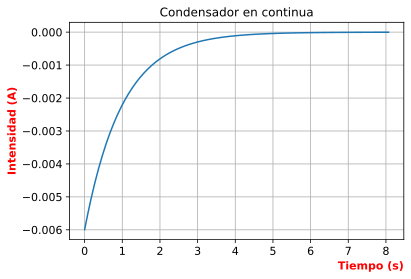

In [269]:
figura = plt.figure()
set_matplotlib_formats('svg')
plt.grid()
plt.title("Condensador en continua")
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right')
plt.ylabel("Intensidad (A)",weight='bold',color='red')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

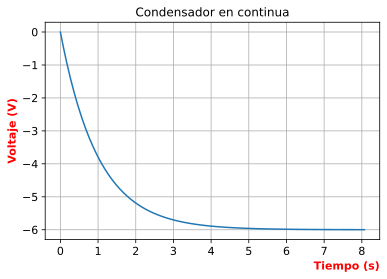

In [267]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
figura = plt.figure()
plt.grid()
plt.title("Condensador en continua")
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right')
plt.ylabel("Voltaje (V)",weight='bold',color='red')
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Una etiqueta")

>Efectivamente es completamente opuesta a la anterior.  

>En el instante cero el condensador, que se encontraba con carga nula, empieza a recibir cargas eléctricas y la intensidad es máxima, podríamos considerar que el condensador se comporta como un conductor perfecto (la intensidad inicial será $I_i= \frac {V_i}{R}$, como si no existiese el condensador). Sin embargo, esa situación no puede mantenerse, a medida que el condensador empieza a aumentar su carga, la intensidad va disminuyendo progresivamente, hasta que, para un tiempo teóricamente infinito, la intensidad sería nula.
  
>En el caso de la tensión, sucede lo contrario, en el instante inicial podemos considerar que la tensión en los terminales del condensador es cero, puesto que hemos dicho que en ese momento se comporta como un conductor perfecto y por lo tanto es como si no estuviese. Cuando ha transcurrido un tiempo infinito, puesto que la corriente pasa a anularse, no hay caída de tensión en la resistencia y la tensión del condensador es la misma que la de la fuente de alimentación.  
En nuestro experimento se puede comprobar que a partir de los 6,5 o 7 s, el condensador ya está totalmente cargado, y la intensidad del circuito se anula en ese momento.

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [65]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3.3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [66]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


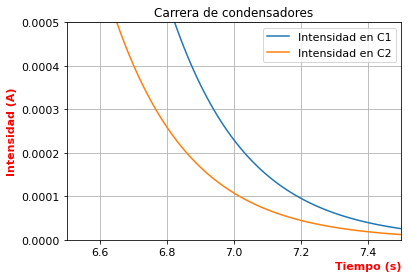

In [67]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.5, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right')
plt.ylabel("Intensidad (A)",weight='bold',color='red')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")
plt.legend()

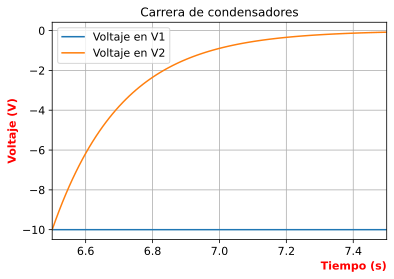

In [295]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.5, 7.5)
plt.grid()
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right')
plt.ylabel("Voltaje (V)",weight='bold',color='red')
plt.plot(resultados['tran']['T'], resultados['tran']['V1'],label="Voltaje en V1")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'],label="Voltaje en V2")
plt.legend()

>Se ve en la gráfica que el único voltaje que varía es el de la rama V2, que va disminuyendo a medida que va discurriendo el tiempo, mientras que el voltaje en V1 se mantiene constante y en el valor inicial de la fuente de alimentación.

>### ¿Qué condensador se satura primero?  
El primer condensador que empieza a recibir tensión es C2, más o menos a los 0.15 s de empezar el experimento, mientras que el condensador C1 tarda 0.3 s en recibir tensión, por lo que el primer condensador que se satura es C2. No obstante, ninguno de los dos llega a saturarse ya que el experimento finaliza antes de que se anule el circuito (analizando los datos desde la gráfica).

**Ejercicio premium:** Repite la simulación con LTspice (invocándolo como comando externo, leyendo los datos de un fichero `.raw` y volviendo a graficar con Matplotlib. 

In [86]:
%%writefile "carrera de condensadores.net"
* Carrera condensador
v0 0 1 10
r1 0 2 3.3k
c1 1 2 47u ic=0
c2 1 2 22u ic=0
.tran 0.01 6.5 7.5
.end

Overwriting carrera de condensadores.net


In [87]:
lts "carrera de condensadores.net"

Text(0, 0.5, 'Intensidad (A)')

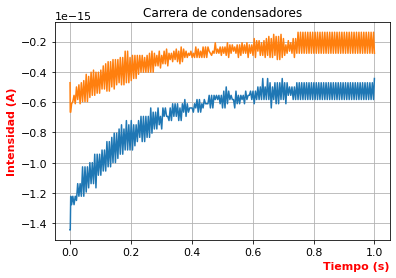

In [89]:
import ltspice
l = ltspice.Ltspice("carrera de condensadores.raw")
l.parse()
tiempo = l.get_time()
intensidad1 = l.get_data('I(C1)')
intensidad2 = l.get_data('I(C2)')
corriente = l.get_data('I(V1)')
plt.plot(tiempo, intensidad1)
plt.plot(tiempo, intensidad2)
plt.grid()
plt.title("Carrera de condensadores")
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right',)
plt.ylabel("Intensidad (A)",weight='bold',color='red')

Para hacer la simulación con LTspice, he tenido que cambiar la sintaxis de ahkab a Ltspice. Además, he eliminado las dos pilas dummy que habíamos añadido para que ahkab pudiera medir intensidades en esas ramas (se supone que LTspice sí que lo hace).  
Aproximadamente, se ve que las gráficas son similares, aunque supongo que el hecho de que no sea una línea definida sino una línea en zig-zag es por una mayor precisión del programa.


## Circuitos en corriente alterna

** Ejercicio:** Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación. Ahkab utiliza otra sintaxis para expresar la corriente alterna. Esta está descrita en la [documentación](https://ahkab.readthedocs.io/en/latest/help/Netlist-Syntax.html#id24). 

### ``Primero lo hacemos con LTspice``

In [287]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 .sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Writing corriente alterna.net


In [56]:
lts "corriente alterna.net"

Text(0, 0.5, 'Voltaje (V)')

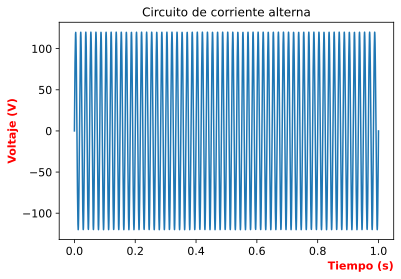

In [57]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
plt.plot(tiempo, voltaje)
plt.title("Circuito de corriente alterna")
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right',)
plt.ylabel("Voltaje (V)",weight='bold',color='red')

Text(0, 0.5, 'Intensidad (A)')

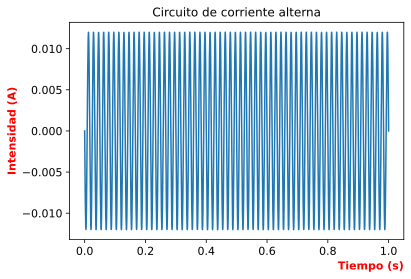

In [55]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
plt.plot(tiempo, corriente)
plt.title("Circuito de corriente alterna")
plt.xlabel("Tiempo (s)",weight='bold',color='red',loc='right',)
plt.ylabel("Intensidad (A)",weight='bold',color='red')

### ``Ahora lo hacemos con ahkab``

Hacemos el cambio de sintaxis de LTspice a ahkab.

In [216]:
%%writefile "corriente alterna.sp"
* Circuito en corriente alterna
v1 1 0 vac=120 type=sin 120 60 1 0 0
r1 0 1 10k
.tran tstep=0.1 tstop=1
.end

Overwriting corriente alterna.sp


# Resumen de lo que se pide
Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas. Todas las gráficas se han pintado con Matplotlib, que es una biblioteca extendidísima en ciencia y tecnología. Es muuuuy bueno que la conozcáis. [Aquí](https://matplotlib.org/tutorials/introductory/pyplot.html) tenéis muchos ejemplos. 